# 

# 

# 

<table>
    <tr>
    <th rowspan= 3> <font style="font-height:100px"> RE </th>
    <td> Create </td>
    </tr>
    <tr>
    <td> Arrange </td>
    </tr>
    <tr>
        <td> Group </td>
    </tr>
</table>

<center> <i> ~ resample ~ </i> </center>

# 

# 

<b><font size=6> I</font></b> know, this is not the perfect title for the AMAZING and MOST AWAITED topic of our pandas journey, but the idea is essential right?
Still I find that the graphic above works somehow. <br>
_
<br>
There is a lot to do in this book. Let's get started.

# 

<center> <font size=5><i>"Resampling refers to the process of converting <br>a time series from one frequency to another"</i> </center>

# 

Aggregation of HIGH freq to LOW freq → "***Downsampling***"<br>
*Amount of variables Decreases*

Aggregation of LOW freq to HIGH freq → "***Upsampling***"<br>
*Amount of variables Increases*

Some times you just don't go high to low or low to high, but shift the time; I call it → "***Sidesampling***" <br>
*Amount of variables stays same*

# 

In [1]:
import pandas as pd
import numpy as np

# 

Going simple.ly

# 

# DOWNSAMPLING

#My reading hours per day data (random) 

In [2]:
index = pd.date_range('2021', '31-12-2021')
ser = pd.Series(np.random.randint(0, 11, len(index)), index= index)
ser

2021-01-01     8
2021-01-02     9
2021-01-03     1
2021-01-04     2
2021-01-05     2
              ..
2021-12-27     0
2021-12-28     1
2021-12-29     3
2021-12-30     8
2021-12-31    10
Freq: D, Length: 365, dtype: int32

In [3]:
# Now I want to find the average reading hours per month
ser.resample('M').mean()

2021-01-31    4.967742
2021-02-28    4.857143
2021-03-31    4.161290
2021-04-30    4.766667
2021-05-31    5.419355
2021-06-30    5.233333
2021-07-31    4.677419
2021-08-31    5.064516
2021-09-30    4.333333
2021-10-31    4.870968
2021-11-30    4.766667
2021-12-31    4.387097
Freq: M, dtype: float64

Cool!<br>
But if you see, it seems like on the last date of each month we have the data - to make it look like it is for WHOLE month, we can use `periods`!

Just need to tweak one parameter.

In [4]:
ser.resample('M', kind= 'period').mean()

2021-01    4.967742
2021-02    4.857143
2021-03    4.161290
2021-04    4.766667
2021-05    5.419355
2021-06    5.233333
2021-07    4.677419
2021-08    5.064516
2021-09    4.333333
2021-10    4.870968
2021-11    4.766667
2021-12    4.387097
Freq: M, dtype: float64

So easy and intuative!

# 

In [5]:
# Now, I want to check the MEAN of EACH DAY across whole YEAR.
ser.groupby(lambda x: x.day_name()).mean()

Friday       5.547170
Monday       4.634615
Saturday     4.653846
Sunday       5.173077
Thursday     3.788462
Tuesday      4.596154
Wednesday    5.134615
dtype: float64

Note, it is **not done** with `resample`.

*I learn more on mondays, Quite realistic though!*

# 

In [6]:
# How much I learn quarterly?
ser.resample('Q', kind= 'period').mean()

2021Q1    4.655556
2021Q2    5.142857
2021Q3    4.695652
2021Q4    4.673913
Freq: Q-DEC, dtype: float64

Aha! Second Quarter is better.

# 

## → Taking into an account the TIME 

Create the data first.

In [21]:
idx = pd.date_range('2021', '31/12/2021', freq= "1H")

In [73]:
index = idx[(idx.hour < 23) & (idx.hour > 8)]

In [76]:
ser = pd.Series(np.random.choice(np.arange(0, 60), len(index)), index= index)
ser

2021-01-01 09:00:00    11
2021-01-01 10:00:00    15
2021-01-01 11:00:00     8
2021-01-01 12:00:00    31
2021-01-01 13:00:00    21
                       ..
2021-12-30 18:00:00    23
2021-12-30 19:00:00    44
2021-12-30 20:00:00    55
2021-12-30 21:00:00    13
2021-12-30 22:00:00    32
Length: 5096, dtype: int32

Now see my data is ready. It shows the hourly data - of reading minutes. (I have cut out the 11PM to 6AM time as there I find my self sleeping)

# 

In [83]:
# Now the same, let's find the SUM of EACH day reading.
per_day = ser.resample('D').sum() / 60
per_day

2021-01-01    5.666667
2021-01-02    6.300000
2021-01-03    8.433333
2021-01-04    6.850000
2021-01-05    6.633333
                ...   
2021-12-26    6.683333
2021-12-27    6.200000
2021-12-28    7.550000
2021-12-29    7.566667
2021-12-30    6.833333
Freq: D, Length: 364, dtype: float64

Cool.

In [85]:
(per_day.min(), per_day.max())

(3.95, 9.833333333333334)

# 

In [117]:
# What is my reading pattern during a week (same as before)
ser.resample('D').sum().groupby(lambda x : x.day_name()).mean() / 60

Friday       6.771795
Monday       6.777244
Saturday     6.779808
Sunday       7.055128
Thursday     6.973718
Tuesday      7.132372
Wednesday    6.651923
dtype: float64

# 

In [129]:
# What is my AVERAGE reading hour per HOUR
ser.groupby(lambda x: x.hour).mean()

9     29.162088
10    29.376374
11    30.843407
12    29.082418
13    29.401099
14    29.991758
15    29.299451
16    31.486264
17    29.282967
18    29.626374
19    28.255495
20    29.129121
21    29.052198
22    28.656593
dtype: float64

It's like I read half an hour per hour!

# 

In [146]:
# What is my AVERAGE reading hour per HOUR per DAY
per_day_per_hour = ser.groupby(lambda x: (x.day_name(), x.hour)).mean()
per_day_per_hour

(Friday, 9)        26.692308
(Friday, 10)       30.846154
(Friday, 11)       32.134615
(Friday, 12)       27.653846
(Friday, 13)       24.134615
                     ...    
(Wednesday, 18)    29.000000
(Wednesday, 19)    25.692308
(Wednesday, 20)    27.250000
(Wednesday, 21)    28.942308
(Wednesday, 22)    27.134615
Length: 98, dtype: float64

In [147]:
per_day_per_hour.index= pd.MultiIndex.from_tuples(per_day_per_hour.index)

In [159]:
import matplotlib.pyplot as plt

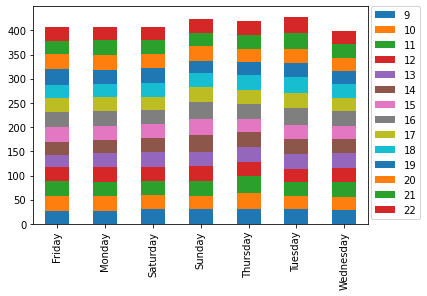

In [160]:
per_day_per_hour.unstack(1).plot(kind= 'bar', stacked= True)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

Not so informative, but still it is a graph ... right?

# 

In [167]:
# Top 10 days when I have read most of the time than the rest - plot on the graph
top10 = ser.resample('D').sum().sort_values(ascending= False)[:10]
top10 / 60

2021-04-29    9.833333
2021-05-09    9.766667
2021-02-01    9.450000
2021-05-22    9.433333
2021-02-24    9.233333
2021-11-07    9.166667
2021-12-09    9.166667
2021-01-15    9.150000
2021-09-04    9.033333
2021-08-03    8.750000
dtype: float64

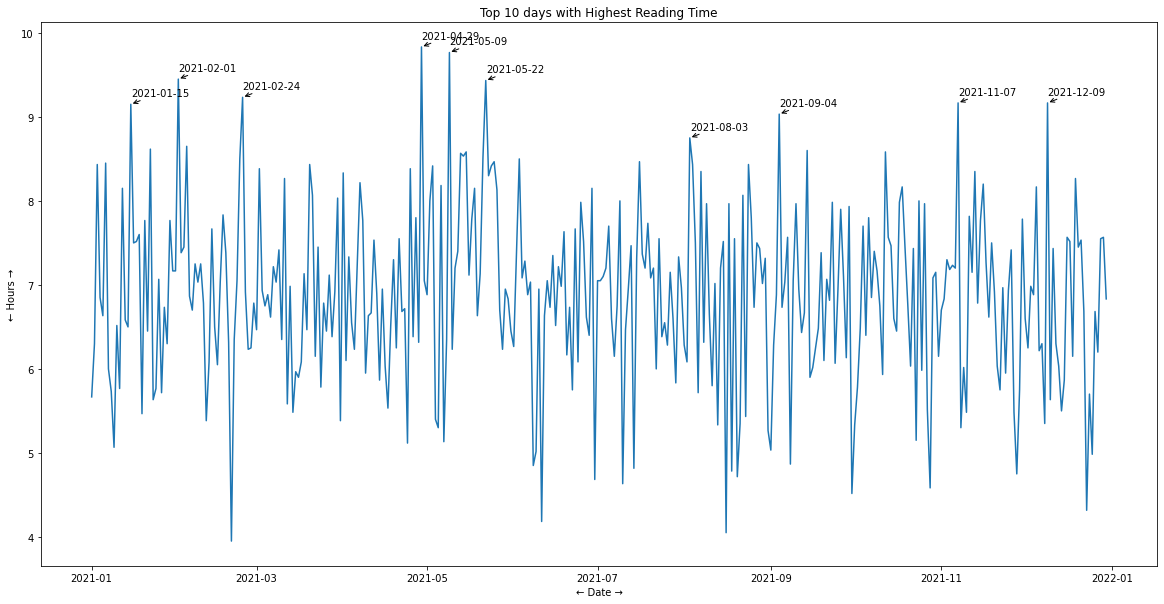

In [194]:
plt.figure(figsize= (20, 10))
plt.plot(per_day)
for date, value in zip(top10.index, top10.values):
    plt.annotate(str(date.date()), xy= (date, value / 60),
                xytext= (date, (value / 60) + 0.1),
                arrowprops= dict(arrowstyle= "->"))
    
plt.title("Top 10 days with Highest Reading Time")
plt.xlabel('← Date →')
plt.ylabel("← Hours →");

## 

# 

## → A new side - *closed* side 

*I guess now, it is ehough to explore my reading patterns. Let's look at other sides of resample*

In [2]:
# For that we need the data to be seperated from 1 minute interval
index = pd.date_range('25/4/2021', periods= 60, freq= 'min')
ser = pd.Series(np.random.randint(0, 100, 60), index= index)
ser[:10]

2021-04-25 00:00:00    59
2021-04-25 00:01:00    89
2021-04-25 00:02:00    60
2021-04-25 00:03:00    80
2021-04-25 00:04:00    11
2021-04-25 00:05:00    86
2021-04-25 00:06:00    84
2021-04-25 00:07:00    85
2021-04-25 00:08:00    70
2021-04-25 00:09:00    54
Freq: T, dtype: int32

#### Now we will take the intervals in minutes (chunk of minutes) and get the mean

In [3]:
# 10 min chunk
ser.resample('10min').mean()

2021-04-25 00:00:00    67.8
2021-04-25 00:10:00    55.0
2021-04-25 00:20:00    35.5
2021-04-25 00:30:00    38.7
2021-04-25 00:40:00    37.6
2021-04-25 00:50:00    55.8
Freq: 10T, dtype: float64

In [4]:
# cross checking
for point in range(0, 60, 10):
    print(ser[point: point+10].mean())

67.8
55.0
35.5
38.7
37.6
55.8


**Hai na same?**

**#WONDERING?** Why the first in ser showing 00:00 while the chunk is of 10 mins? <br>
ANSWER: It is because be default *resample* puts the LEFT LABEL. To change, we can do it for right label.

## → `label= 'left' or 'right'` 

In [5]:
# 10 min chunk
ser.resample('10min', label= 'right').mean()

2021-04-25 00:10:00    67.8
2021-04-25 00:20:00    55.0
2021-04-25 00:30:00    35.5
2021-04-25 00:40:00    38.7
2021-04-25 00:50:00    37.6
2021-04-25 01:00:00    55.8
Freq: 10T, dtype: float64

__Noting in the calculation will be changed__, but the label displayed in a different way. <br>
*NOTE:* When the kind is 'period' - label = 'left' / 'right' won't make any difference. It will be the same in both cases.

# 

## Main part - `closed side` 

*This is the main section's title - isn't it?*

> This is where calculation starts making difference.

In [6]:
ser.resample('10min', closed= 'left').mean()

2021-04-25 00:00:00    67.8
2021-04-25 00:10:00    55.0
2021-04-25 00:20:00    35.5
2021-04-25 00:30:00    38.7
2021-04-25 00:40:00    37.6
2021-04-25 00:50:00    55.8
Freq: 10T, dtype: float64

**COMPARE** ↑ this and ↓ this

In [7]:
ser.resample('10min', closed= 'right').mean()

2021-04-24 23:50:00    59.000000
2021-04-25 00:00:00    65.500000
2021-04-25 00:10:00    54.600000
2021-04-25 00:20:00    32.800000
2021-04-25 00:30:00    44.900000
2021-04-25 00:40:00    40.600000
2021-04-25 00:50:00    51.222222
Freq: 10T, dtype: float64

See? Both are calculated for the same frequency but both have different results.

Why?

LET'S INSPECT

In [8]:
# In the closed = 'LEFT' (which is DEFAULT), we see
list(ser.resample('10min', closed= 'left'))

[(Timestamp('2021-04-25 00:00:00', freq='10T'),
  2021-04-25 00:00:00    59
  2021-04-25 00:01:00    89
  2021-04-25 00:02:00    60
  2021-04-25 00:03:00    80
  2021-04-25 00:04:00    11
  2021-04-25 00:05:00    86
  2021-04-25 00:06:00    84
  2021-04-25 00:07:00    85
  2021-04-25 00:08:00    70
  2021-04-25 00:09:00    54
  Freq: T, dtype: int32),
 (Timestamp('2021-04-25 00:10:00', freq='10T'),
  2021-04-25 00:10:00    36
  2021-04-25 00:11:00    55
  2021-04-25 00:12:00    70
  2021-04-25 00:13:00    47
  2021-04-25 00:14:00    15
  2021-04-25 00:15:00    36
  2021-04-25 00:16:00    71
  2021-04-25 00:17:00    73
  2021-04-25 00:18:00    56
  2021-04-25 00:19:00    91
  Freq: T, dtype: int32),
 (Timestamp('2021-04-25 00:20:00', freq='10T'),
  2021-04-25 00:20:00    32
  2021-04-25 00:21:00    23
  2021-04-25 00:22:00    35
  2021-04-25 00:23:00    70
  2021-04-25 00:24:00    25
  2021-04-25 00:25:00     8
  2021-04-25 00:26:00    25
  2021-04-25 00:27:00    24
  2021-04-25 00:28:0

In [233]:
# In the closed = 'RIGHT', we see
list(ser.resample('10min', closed= 'right'))

[(Timestamp('2021-04-24 23:50:00', freq='10T'),
  2021-04-25    37
  Freq: T, dtype: int32),
 (Timestamp('2021-04-25 00:00:00', freq='10T'),
  2021-04-25 00:01:00    58
  2021-04-25 00:02:00    88
  2021-04-25 00:03:00    58
  2021-04-25 00:04:00    56
  2021-04-25 00:05:00    87
  2021-04-25 00:06:00    39
  2021-04-25 00:07:00    51
  2021-04-25 00:08:00    65
  2021-04-25 00:09:00    84
  2021-04-25 00:10:00    88
  Freq: T, dtype: int32),
 (Timestamp('2021-04-25 00:10:00', freq='10T'),
  2021-04-25 00:11:00    65
  2021-04-25 00:12:00    91
  2021-04-25 00:13:00    83
  2021-04-25 00:14:00    18
  2021-04-25 00:15:00    65
  2021-04-25 00:16:00    37
  2021-04-25 00:17:00     4
  2021-04-25 00:18:00    70
  2021-04-25 00:19:00    35
  2021-04-25 00:20:00    15
  Freq: T, dtype: int32),
 (Timestamp('2021-04-25 00:20:00', freq='10T'),
  2021-04-25 00:21:00    33
  2021-04-25 00:22:00    57
  2021-04-25 00:23:00    20
  2021-04-25 00:24:00    48
  2021-04-25 00:25:00    55
  2021-04-2

# 

Difference right?

**In LEFT closed**: `0 - 9`, `10 - 19`, `20 - 29` ... <br>
**In RIGHT closed**: `1 - 10`, `11 - 20`, `21 - 30` ...

And in RIGHT closed case, we see that it has **generated new date** which is non - existant in the data - 24/4 to include the first entry.

___

### Still didn't understand why?
I know you would. Let's do a little more research.

In [9]:
# The data is of 10 minutes - made with seconds
index = pd.date_range('25/4/2021', periods= 600, freq= 's')
ser = pd.Series(np.random.randint(0, 10, len(index)), index= index)
ser

2021-04-25 00:00:00    2
2021-04-25 00:00:01    1
2021-04-25 00:00:02    4
2021-04-25 00:00:03    7
2021-04-25 00:00:04    4
                      ..
2021-04-25 00:09:55    7
2021-04-25 00:09:56    6
2021-04-25 00:09:57    7
2021-04-25 00:09:58    7
2021-04-25 00:09:59    8
Freq: S, Length: 600, dtype: int32

# 

In [10]:
# Doing the 2 mins gap
ser.resample('2min').mean()

2021-04-25 00:00:00    4.200000
2021-04-25 00:02:00    4.791667
2021-04-25 00:04:00    4.483333
2021-04-25 00:06:00    4.391667
2021-04-25 00:08:00    4.675000
Freq: 2T, dtype: float64

In [11]:
# Doing the 2 mins gap
ser.resample('2min', closed= 'right').mean()

2021-04-24 23:58:00    2.000000
2021-04-25 00:00:00    4.200000
2021-04-25 00:02:00    4.791667
2021-04-25 00:04:00    4.483333
2021-04-25 00:06:00    4.450000
2021-04-25 00:08:00    4.638655
Freq: 2T, dtype: float64

# 

In [12]:
list(ser.resample('2min', closed= 'left'))

[(Timestamp('2021-04-25 00:00:00', freq='2T'),
  2021-04-25 00:00:00    2
  2021-04-25 00:00:01    1
  2021-04-25 00:00:02    4
  2021-04-25 00:00:03    7
  2021-04-25 00:00:04    4
                        ..
  2021-04-25 00:01:55    4
  2021-04-25 00:01:56    9
  2021-04-25 00:01:57    0
  2021-04-25 00:01:58    9
  2021-04-25 00:01:59    8
  Freq: S, Length: 120, dtype: int32),
 (Timestamp('2021-04-25 00:02:00', freq='2T'),
  2021-04-25 00:02:00    2
  2021-04-25 00:02:01    0
  2021-04-25 00:02:02    0
  2021-04-25 00:02:03    8
  2021-04-25 00:02:04    3
                        ..
  2021-04-25 00:03:55    0
  2021-04-25 00:03:56    9
  2021-04-25 00:03:57    8
  2021-04-25 00:03:58    3
  2021-04-25 00:03:59    3
  Freq: S, Length: 120, dtype: int32),
 (Timestamp('2021-04-25 00:04:00', freq='2T'),
  2021-04-25 00:04:00    2
  2021-04-25 00:04:01    5
  2021-04-25 00:04:02    1
  2021-04-25 00:04:03    4
  2021-04-25 00:04:04    5
                        ..
  2021-04-25 00:05:55    

COMPARE ↑ these ↓ both

In [13]:
list(ser.resample('2min', closed= 'right'))

[(Timestamp('2021-04-24 23:58:00', freq='2T'),
  2021-04-25    2
  Freq: S, dtype: int32),
 (Timestamp('2021-04-25 00:00:00', freq='2T'),
  2021-04-25 00:00:01    1
  2021-04-25 00:00:02    4
  2021-04-25 00:00:03    7
  2021-04-25 00:00:04    4
  2021-04-25 00:00:05    1
                        ..
  2021-04-25 00:01:56    9
  2021-04-25 00:01:57    0
  2021-04-25 00:01:58    9
  2021-04-25 00:01:59    8
  2021-04-25 00:02:00    2
  Freq: S, Length: 120, dtype: int32),
 (Timestamp('2021-04-25 00:02:00', freq='2T'),
  2021-04-25 00:02:01    0
  2021-04-25 00:02:02    0
  2021-04-25 00:02:03    8
  2021-04-25 00:02:04    3
  2021-04-25 00:02:05    8
                        ..
  2021-04-25 00:03:56    9
  2021-04-25 00:03:57    8
  2021-04-25 00:03:58    3
  2021-04-25 00:03:59    3
  2021-04-25 00:04:00    2
  Freq: S, Length: 120, dtype: int32),
 (Timestamp('2021-04-25 00:04:00', freq='2T'),
  2021-04-25 00:04:01    5
  2021-04-25 00:04:02    1
  2021-04-25 00:04:03    4
  2021-04-25 00

Now? 

**My Interpretation:** Where the side is closed, it's like THAT's it! Nothing allowed.

Like see, when the LEFT side was closed, it SHARPLY, Cookie cutterly, Solidely started with 00:00 not a second up or down. And when the right side is closed, the left side could start from 00:01, that means it can allow other details too, like 00:01:001 or something like that, it is not strict

When the RIGHT side is closed it SHARPLY, restricted to end at 01:00 means no other details is allowed. That's like integer. And open side can allow float. *(I got a good one)*

-- <br>
Summry:<br>
Closed side - Intger (like) - *inclusive* <br>
Open side - Float (like) - *exclusive*

# 

## → Changing time while doing resampling.
`loffset`

In [20]:
# Take a look at this
ser.resample('5T').mean()

2021-04-25 00:00:00    4.513333
2021-04-25 00:05:00    4.503333
Freq: 5T, dtype: float64

In [21]:
# Take a look at this
ser.resample('5T', loffset= '-1T').mean()

<ipython-input-21-9e9a47fb04b0>:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ser.resample('5T', loffset= '-1T').mean()


2021-04-24 23:59:00    4.513333
2021-04-25 00:04:00    4.503333
Freq: 5T, dtype: float64

**CAUTION:** As the warning suggests ↑ `loffset` will be depricated in the future versions. <br>
So we should use ↓

In [33]:
from pandas.tseries.frequencies import to_offset

In [42]:
result = ser.resample('5T').mean()
result.index = result.index + to_offset('-1T')
result

2021-04-24 23:59:00    4.513333
2021-04-25 00:04:00    4.503333
Freq: 5T, dtype: float64

Same.

**Interpretation**: As we can see (and also from the NEW process) it doesn't affect the data, it is related only with the index. So it will make increment or decrement in the indices (time) only.

**Why did that?**: It is to make some clarity in the understanding the data.

### ↑ We could have also done this with SHIFT. ↑

In [47]:
# Like this               ↓
ser.resample('5T').mean().shift(freq= "-1s")

2021-04-24 23:59:59    4.513333
2021-04-25 00:04:59    4.503333
Freq: 5T, dtype: float64

So basically we have three ways!
1. `loffset=`
2. `to_offset()`
3. `shift(freq=)`

# 

## → `ohlc` So easy!

In [52]:
ser.resample('2min').ohlc()

,open,high,low,close
2021-04-25 00:00:00,2,9,0,8
2021-04-25 00:02:00,2,9,0,3
2021-04-25 00:04:00,2,9,0,7
2021-04-25 00:06:00,2,9,0,1
2021-04-25 00:08:00,9,9,0,8


It will go for each group of time (period) and compute the FIRST, LAST, MAX, MIN out of them. It is realy easy to understand.<br>
It is manually doable. *(Again, computations will change if you change closed= right)*

# 

# Till now,
We saw the `Downsampling` where we did *Zoom out* from the detailed data. <br>

Now it is time for `Upsampling & Interpolation` which will *Zoom in* the data. <br>
*(**Notice**: That I used term 'Interpolation' with Upsampling - why? Because when we zoom in, we need to fill the artificial data in it. Remember in photoshop if you enlarge the image, it fills the pixels?)*

# 

# UPSAMPLING & INTERPOLATION

→ Key: *When converting low frequency to high frequency (upsampling) ***NO AGGREGATION*** is needed*

# 

In [62]:
# Here we will take dataframe into consideration!
df = pd.DataFrame(np.random.randint(0, 6, (3, 2)),
                  columns= ['Book', 'Coursera'],
                  index= pd.DatetimeIndex(['6/10/2021', '6/12/2021', '6/17/2021']))
                  
df

,Book,Coursera
2021-06-10,4,3
2021-06-12,1,4
2021-06-17,1,1


#### 

In [64]:
df.resample('D').mean()

,Book,Coursera
2021-06-10,4.0,3.0
2021-06-11,NaN,NaN
2021-06-12,1.0,4.0
2021-06-13,NaN,NaN
2021-06-14,NaN,NaN
2021-06-15,NaN,NaN
2021-06-16,NaN,NaN
2021-06-17,1.0,1.0


See ↑ aggregation in upscaling wont make any sense!

#### So how are we gonna do that? I mean...
How can we "SEE" the resampled data without aggregation? 
1. list(resampleddata) ? - Nah! It is not feasible
2. use - `asfreq()` (BEST)

# 

# <center> | HONORABLE MENTION | </center>

#### <center> `asfreq` </center>

**asfreq**: <br>
It actully prints THAT date's data without any aggregation.

In [72]:
# See here the aggregation
ser.resample('2min').mean()

2021-04-25 00:00:00    4.200000
2021-04-25 00:02:00    4.791667
2021-04-25 00:04:00    4.483333
2021-04-25 00:06:00    4.391667
2021-04-25 00:08:00    4.675000
Freq: 2T, dtype: float64

    Here it has done the computation of 2 minutes blocks and used the mean agg.

###### 

In [78]:
# But here            ↓
ser.resample('2min').asfreq()

2021-04-25 00:00:00    2
2021-04-25 00:02:00    2
2021-04-25 00:04:00    2
2021-04-25 00:06:00    2
2021-04-25 00:08:00    9
Freq: 2T, dtype: int32

    Here ↑ like just the `pivot` function - it printed all values on that date.
    ------------------
    Little cheat sheet:
    ------------------
    
    pivot       == resample().asfreq()
    pivot_table == resample().mean()

**So it turns out that** as freq is a better option when you need not to do any kind of aggregation but - just the data on that time frame.

***Secret:*** *It is (asfreq) will be so useful in this section*

# 

### So back to the topic...

In [96]:
df.resample('D').asfreq()

,Book,Coursera
2021-06-10,4.0,3.0
2021-06-11,NaN,NaN
2021-06-12,1.0,4.0
2021-06-13,NaN,NaN
2021-06-14,NaN,NaN
2021-06-15,NaN,NaN
2021-06-16,NaN,NaN
2021-06-17,1.0,1.0


Here, we can't (should't) use the aggregation - so we can use the `asfreq` here.

Now, <br>
As you can see it has zoomed in and filled the gaps with NaN and produced new dates.

# 

#### Now to fill the data...

In [102]:
df.resample('D').ffill()

,Book,Coursera
2021-06-10,4,3
2021-06-11,4,3
2021-06-12,1,4
2021-06-13,1,4
2021-06-14,1,4
2021-06-15,1,4
2021-06-16,1,4
2021-06-17,1,1


Of course, no need to use `.asferq` here.

In [103]:
df.resample('D').ffill(limit = 2)

,Book,Coursera
2021-06-10,4.0,3.0
2021-06-11,4.0,3.0
2021-06-12,1.0,4.0
2021-06-13,1.0,4.0
2021-06-14,1.0,4.0
2021-06-15,NaN,NaN
2021-06-16,NaN,NaN
2021-06-17,1.0,1.0


Whoo hoo!

#### That even possible to see MONDAYS even if they are not in the data!

In [104]:
df

,Book,Coursera
2021-06-10,4,3
2021-06-12,1,4
2021-06-17,1,1


In [108]:
df.resample('W-MON').asfreq()

,Book,Coursera
2021-06-14,NaN,NaN
2021-06-21,NaN,NaN


In [113]:
df.resample('W-MON').ffill()

,Book,Coursera
2021-06-14,1,4
2021-06-21,1,1


# 

# <center>  . . . </center>

# 